# CV19Mobility: Mobility Dynamics Library
This jupyter notebook shows the basic use of the cv19mobilty module, which is used for establishing the mobility dynamics necessary for the meta-populational models. 
This library is able to:
1. Create artificial mobility matrix based in well-studied mobility models
2. Create dynamic mobility patterns for simulating the differences in movement throughout the day
3. Importing and exporting mobility matrix and functions 
4. Create artificial distance matrix for using them on the creation of the models

All the random generator functions can be set using a seed in order to be able to repeat the experiments getting the same results. 

In [1]:
import cv19gm.utils.cv19mobility as cv19mobility
import numpy as np
# visualization
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

## Distances 
The distances can be imported as a numpy array, or can be generated randomly using the `create_random_distances_matrix()` function. 

In [2]:
seed = 1

In [3]:
# Input as set of populations
populations = np.array([10000, 20000, 25000, 30000, 40000])  # Population sizes for each region
# Creates a random distances based on the given populations. 
distances = cv19mobility.create_random_distances_matrix(size = len(populations), min_distance = 50, max_distance= 1000,seed = seed)
print(distances)

[[  0.         702.55031902 476.39454266 716.01998489 554.5431592 ]
 [702.55031902   0.         499.98766355 374.72680784 196.28473883]
 [476.39454266 499.98766355   0.         615.98230269 424.48325677]
 [716.01998489 374.72680784 615.98230269   0.         640.44900662]
 [554.5431592  196.28473883 424.48325677 640.44900662   0.        ]]


## Static Matrix
Generates a static matrix representing the daily flux of people between the different populations. This can be done using one of the 3 implemented models: 
* **Gravity model:** The gravity model, inspired by Newton's law of gravitation, is a widely used spatial interaction model in various fields, such as transportation, human migration, and trade. The model assumes that the interaction between two regions (e.g., the number of people moving between them) is directly proportional to the product of their populations (or other attributes, like economic size) and inversely proportional to some power of the distance between them.
* **Radiation model:** The radiation model is an alternative to the gravity model for estimating spatial interactions. It was proposed to overcome some of the limitations of the gravity model, mainly the need for calibration of parameters (alpha and beta). The radiation model is derived from a probabilistic framework and does not require any free parameters. It is based on the concept of intervening opportunities, which means that the interaction between two regions is determined by the number of opportunities (e.g., jobs) that are available in other regions located between them.

* **Random model:** Random matrix that based on a uniform probability for moving the specified fraction of the population. 

In case there's no distance matrix, the method will call the `create_random_distances_matrix()` function for creating a distances matrix, using the given seed if there is one. 

This matrix can be created using the general method `create_mobility_matrix()` or instancing the specific method of each model. 

In [4]:
cv19mobility.create_mobility_matrix(populations)

array([[  0,  31,  43,  50,  74],
       [  4,   0,  12,  14, 368],
       [ 66, 134,   0, 117, 182],
       [ 71, 150, 109,   0, 268],
       [ 19, 697,  32,  50,   0]])

In [5]:
radiation_matrix = cv19mobility.create_mobility_matrix(populations, model='radiation',distances=distances)
gravity_matrix = cv19mobility.create_mobility_matrix(populations, model='gravity', seed=seed, alpha=1,beta=1,fraction=0.5)
random_matrix = cv19mobility.create_mobility_matrix(populations, model='random',seed=seed)

print("Gravity model mobility matrix:")
print(gravity_matrix)
print("Radiation model mobility matrix:")
print(radiation_matrix)
print("Random mobility model mobility matrix:")
print(random_matrix)

Gravity model mobility matrix:
[[   0  734 1337 1080 1847]
 [ 426    0 1483 2348 5740]
 [1286 2455    0 3009 5749]
 [1240 4637 3590    0 5531]
 [1640 8771 5307 4279    0]]
Radiation model mobility matrix:
[[  0  76  41  51  30]
 [261   0  74  46  18]
 [229 120   0  98  51]
 [327  85 112   0  73]
 [428  75 131 164   0]]
Random mobility model mobility matrix:
[[  0  30   8 150  10]
 [ 15   0 242  67  74]
 [  7 184   0 252  55]
 [359  44 168   0  27]
 [156  78 116 448   0]]


In [6]:
cv19mobility.random_mobility_model(populations,fraction=1) #, seed=seed)

array([[    0,   572,  3047,  4049,  2331],
       [ 1190,     0,   488,  7820, 10500],
       [ 5733,  1419,     0, 14043,  3804],
       [ 1200,  2189,  6623,     0, 19987],
       [  389, 10831, 17130, 11648,     0]])

## Dynamic Matrix
The library is cable to produce dynamic matrix, which are functions of time that take into account the variability in movement throughouit the day. For this, the model takes a static matrix and applies a dynamic function following one of the following models:
1. **sinusoidal_mobility_pattern:** A time-varying mobility matrix function using a sinusoidal pattern
2. **rush_hour_mobility_pattern:** Creates a time-varying mobility matrix function using a rush hour pattern, which has 2 peaks a day at the specified hopurs

The dynamic matrix can be created using the general constructor `create_dynamic_mobility()` or using the method of each specific model. 

In [7]:
def visualize_dynamic_patter(dynamic_pattern,min=0, max=24, step=0.5):
    vmin = np.min([dynamic_pattern(i*step)for i in np.linspace(min,max,int((max-min)/step))])
    vmax = np.max([dynamic_pattern(i*step)for i in np.linspace(min,max,int((max-min)/step))])
# Visualization function
    def plot_mobility_matrix(t):
        mobility_matrix_t = dynamic_pattern(t/24)
        plt.figure(figsize=(8, 6))
        plt.imshow(mobility_matrix_t, cmap='viridis', origin='lower',vmin=vmin, vmax=vmax)
        plt.colorbar(label='Mobility')
        plt.title(f"Time-varying Mobility Matrix at t = {t} hours")
        plt.xlabel("Destination Region")
        plt.ylabel("Origin Region")
        plt.xticks(range(len(dynamic_pattern(0))))
        plt.yticks(range(len(dynamic_pattern(0))))
        plt.show()

    # Interactive plot
    interact(plot_mobility_matrix, t=FloatSlider(min=min, max=max, step=step, value=0, continuous_update=False))

### Sinusoidal pattern

In [8]:
test = cv19mobility.symmetric_mobility_pattern(gravity_matrix,seed=seed)

In [9]:
test(0.1)

array([[   0,  734, 1337, 1080, 1847],
       [ 426,    0, 1483, 2348, 5740],
       [1286, 2455,    0, 3009, 5749],
       [1240, 4637, 3590,    0, 5531],
       [1640, 8771, 5307, 4279,    0]])

In [10]:
sinusoidal_pattern = cv19mobility.create_dynamic_mobility(mobility_model='radiation', dynamic_pattern='sinusoidal', populations=populations,seed=seed, fraction=0.5)

In [11]:
min=0
max=24
step=0.5
np.max([sinusoidal_pattern(i*step)for i in np.linspace(min,max,int((max-min)/step))])

5317.029119044954

In [12]:
visualize_dynamic_patter(sinusoidal_pattern)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=24.0, step=0.5), Ou…

### Rush-hour pattern

In [13]:
rush_hour_pattern = cv19mobility.create_dynamic_mobility(mobility_model='radiation', dynamic_pattern='rush_hour', populations=populations, seed=seed, fraction=0.5)

In [14]:
visualize_dynamic_patter(rush_hour_pattern)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=24.0, step=0.5), Ou…

### Symmetric pattern

In [15]:
symmetric_pattern = cv19mobility.create_dynamic_mobility(mobility_model='radiation', dynamic_pattern='symmetric', populations=populations, seed=seed, fraction=0.5)

In [16]:
visualize_dynamic_patter(symmetric_pattern)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=24.0, step=0.5), Ou…

# Working with metapopoulational models

In [17]:
from cv19gm.models.seir_meta import SEIRMETA

We create a SEIR model for a 3 regions world, where only one population has infected individuals. 

In [18]:
seed = 42
cfg = 'cfg/SEIRMETA.toml'
populations = np.array([15000, 25000, 40000])
Phi = cv19mobility.create_dynamic_mobility(mobility_model='radiation', dynamic_pattern='rush_hour', populations=populations, seed=seed, fraction=0.01)
beta = [0.1,0.15,0.13]
mu = [1,1,1]
I = [10,0,0]
I_d = [1,0,0]
I_ac = [0,0,0]
R = [0,0,0]
 
seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=populations,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,t_end=500)

In [19]:
seir.solve()

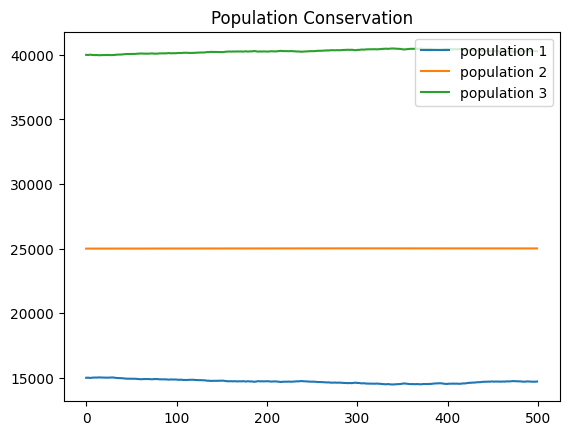

In [20]:
plt.plot(seir.t,seir.N[0],label='population 1')
plt.plot(seir.t,seir.N[1],label='population 2')
plt.plot(seir.t,seir.N[2],label='population 3')
plt.title('Population Conservation')
plt.legend(loc=0)
plt.show()

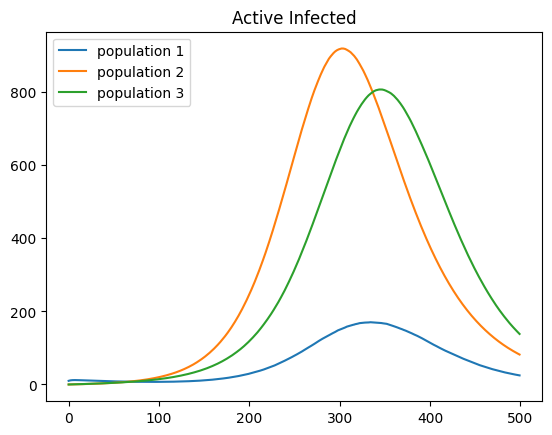

In [21]:
plt.plot(seir.t,seir.I[0],label='population 1')
plt.plot(seir.t,seir.I[1],label='population 2')
plt.plot(seir.t,seir.I[2],label='population 3')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()